In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


BASE_PATH = os.path.dirname(os.getcwd())
PLOT_FILE_PATH = f"{BASE_PATH}/data/plot_data.ods"

# Gráfico em 3D dos Experimentos da Curva de Pareto

In [33]:
pareto_g3 = pd.read_excel(PLOT_FILE_PATH, sheet_name="pareto_g3")
pareto_g6 = pd.read_excel(PLOT_FILE_PATH, sheet_name="pareto_g6")

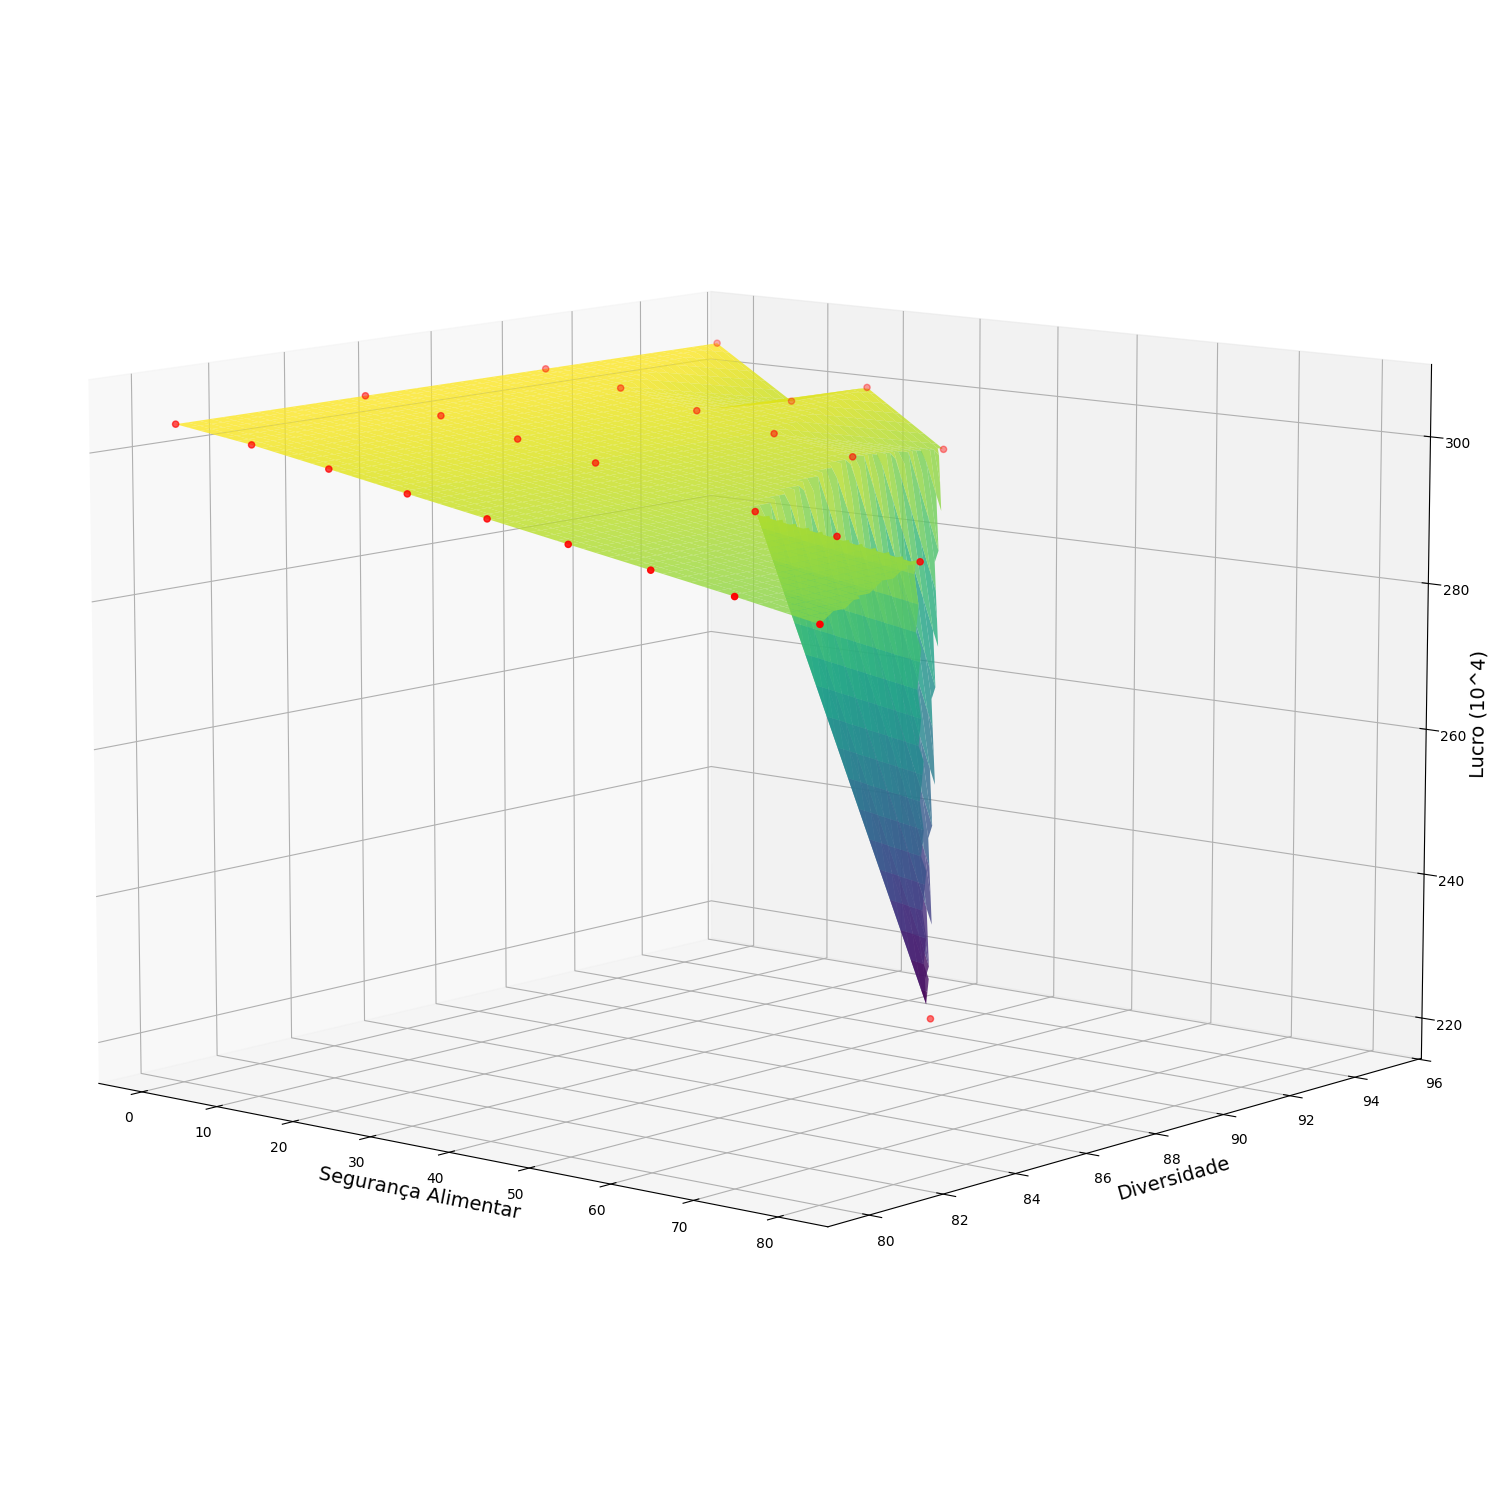

In [17]:
# Separa os dados nos arrays x, y e z
df = pareto_g3.drop(["Tempo (s)", "GAP"], axis=1).dropna()
x = df["seguranca_alimentar"].values
y = df["diversidade"].values
z = df["lucro"].values / 10000

# Geração de grade regular para interpolar
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolação da superfície
zi = griddata((x, y), z, (xi, yi), method="linear")

# Desenho do gráfico
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xi, yi, zi, cmap="viridis", alpha=0.8)
ax.scatter(x, y, z, color="red")

# Configuração das legendas
ax.set_xlabel("Segurança Alimentar", fontsize=14)
ax.set_ylabel("Diversidade", fontsize=14)
ax.set_zlabel("Lucro (10^4)", labelpad=1, fontsize=14)

# Visualização com duas rotações: (10, 100) e (10, -50)
ax.view_init(elev=10, azim=-50)
plt.tight_layout()
plt.show()

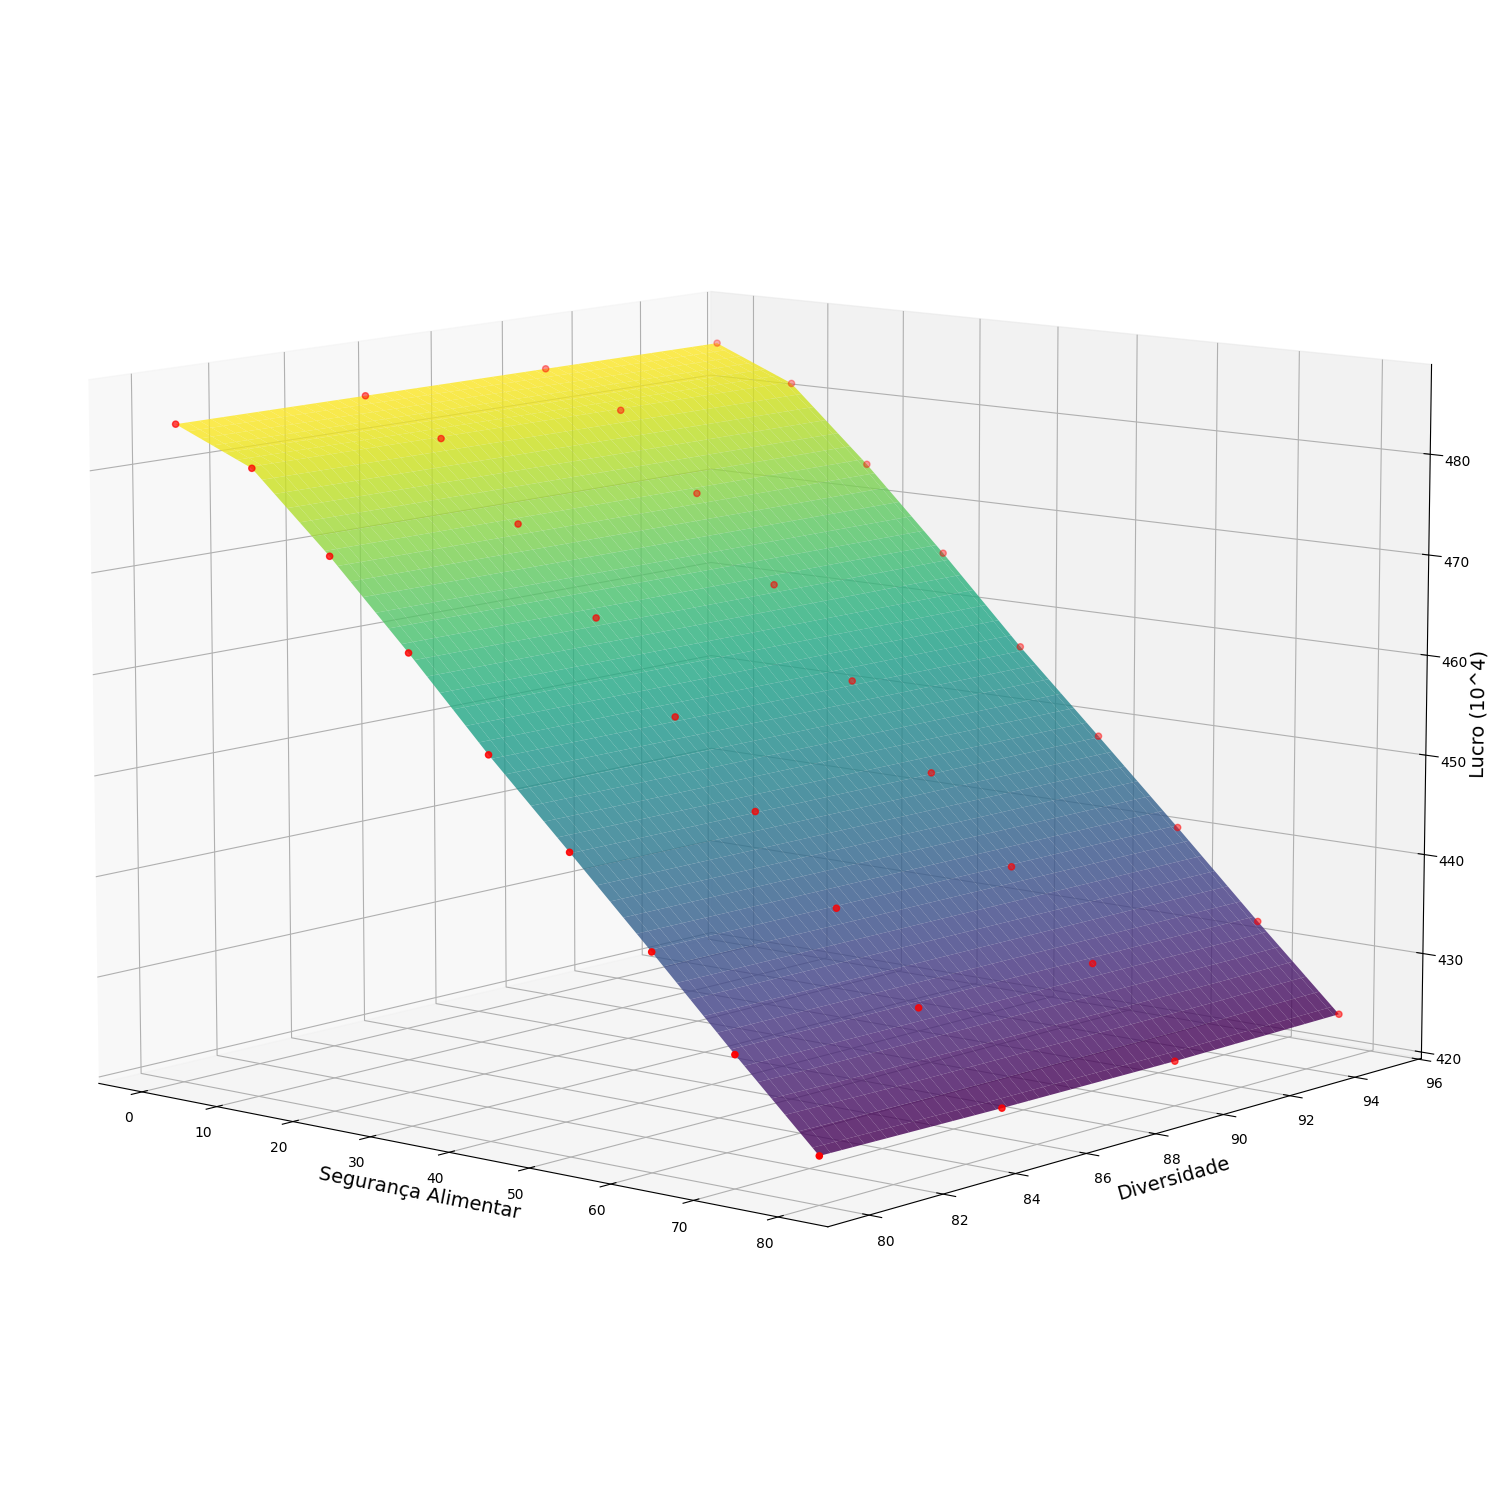

In [19]:
# Separa os dados nos arrays x, y e z
df = pareto_g6.drop(["Tempo (s)", "GAP"], axis=1).dropna()
x = df["seguranca_alimentar"].values
y = df["diversidade"].values
z = df["lucro"].values / 10000

# Geração de grade regular para interpolar
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolação da superfície
zi = griddata((x, y), z, (xi, yi), method="linear")

# Desenho do gráfico
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xi, yi, zi, cmap="viridis", alpha=0.8)
ax.scatter(x, y, z, color="red")

# Configuração das legendas
ax.set_xlabel("Segurança Alimentar", fontsize=14)
ax.set_ylabel("Diversidade", fontsize=14)
ax.set_zlabel("Lucro (10^4)", labelpad=1, fontsize=14)

# Visualização com duas rotações: (10, 100) e (10, -50)
ax.view_init(elev=10, azim=-50)
plt.tight_layout()
plt.show()

# Curvas de Nível para Experimentos da Curva de Pareto

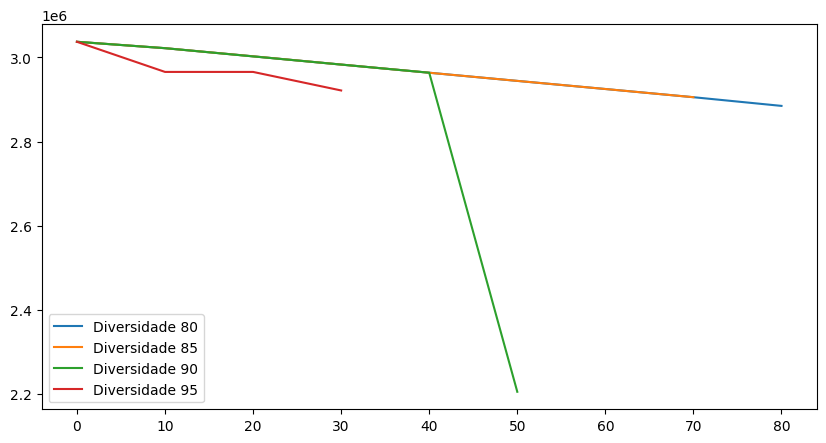

In [34]:
# Encontra os intervalos de variação
food_security = pareto_g3["seguranca_alimentar"].unique()
food_security.sort()

diversity = pareto_g3["diversidade"].unique()
diversity.sort()

# Inicializa a visualização dos gráficos
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Para cada valor de diversidade, recupera valores
for d in diversity:
    subset = pareto_g3.loc[pareto_g3["diversidade"] == d].sort_values("seguranca_alimentar")
    x, y = [], []
    for i in range(0, len(subset)):
        fs_value = subset["seguranca_alimentar"].values[i]
        p_value = subset["lucro"].values[i]

        if not np.isnan(p_value):
            x.append(fs_value)
            y.append(p_value)

    ax.plot(x, y, label=f"Diversidade {d}")

plt.legend()
plt.show()
    